<a href="https://colab.research.google.com/github/kabil3399/Used-car-price-prediction-using-linear-regression/blob/main/Used_car_price_prediction_Using_linear_rigresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNDERSTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

 IMPORTING LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
# from jupyterthemes import jtplot # Jupyter Notebook Theme
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.


In [5]:
# Read the CSV file 
df=pd.read_csv("cars_data.csv")
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [6]:
# Load the top 10 instances
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [7]:
# Load the bottom 10 instances 
df.tail(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
418,Volvo,S60 2.5 4dr,Sedan,Europe,All,"$31,745","$29,916",2.5,5.0,208,20,27,3903,107,180
419,Volvo,S60 T5 4dr,Sedan,Europe,Front,"$34,845","$32,902",2.3,5.0,247,20,28,3766,107,180
420,Volvo,S60 R 4dr,Sedan,Europe,All,"$37,560","$35,382",2.5,5.0,300,18,25,3571,107,181
421,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6.0,208,20,28,3576,110,190
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5.0,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [8]:
# Display the feature columns
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [9]:
# Check the shape of the dataframe
df.shape

(428, 15)

In [10]:
# Check if any missing values are present in the dataframe
df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [13]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns

# df["MSRP"] = df["MSRP"].str.replace("$", "")
# df["MSRP"] = df["MSRP"].str.replace(",", "")
# df["MSRP"] = df["MSRP"].astype(int)

df["MSRP"]=df["MSRP"].str.replace("$","")
df["MSRP"]=df["MSRP"].str.replace(",","")
df["MSRP"]=df["MSRP"].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [14]:
df["Invoice"]=df["Invoice"].str.replace("$","")
df["Invoice"]=df["Invoice"].str.replace(",","")
df["Invoice"]=df["Invoice"].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [15]:
df["MSRP"]

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 428, dtype: int64


Repeating the same procedure for the invoice column

In [16]:
df["Invoice"]

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 428, dtype: int64

In [17]:
# Let's view the updated MSRP and Invoice Columns
df["MSRP"],df["Invoice"]

(0      36945
 1      23820
 2      26990
 3      33195
 4      43755
        ...  
 423    40565
 424    42565
 425    45210
 426    26135
 427    35145
 Name: MSRP, Length: 428, dtype: int64, 0      33337
 1      21761
 2      24647
 3      30299
 4      39014
        ...  
 423    38203
 424    40083
 425    42573
 426    24641
 427    33112
 Name: Invoice, Length: 428, dtype: int64)

In [18]:
# Display the updated summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB



- What is the maximum price of the used car?
- What is the minimum price of the used car?

In [19]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [20]:
df["MSRP"].min(),df["MSRP"].max()

(10280, 192465)

PERFORMING DATA VISUALIZATION - PART #1

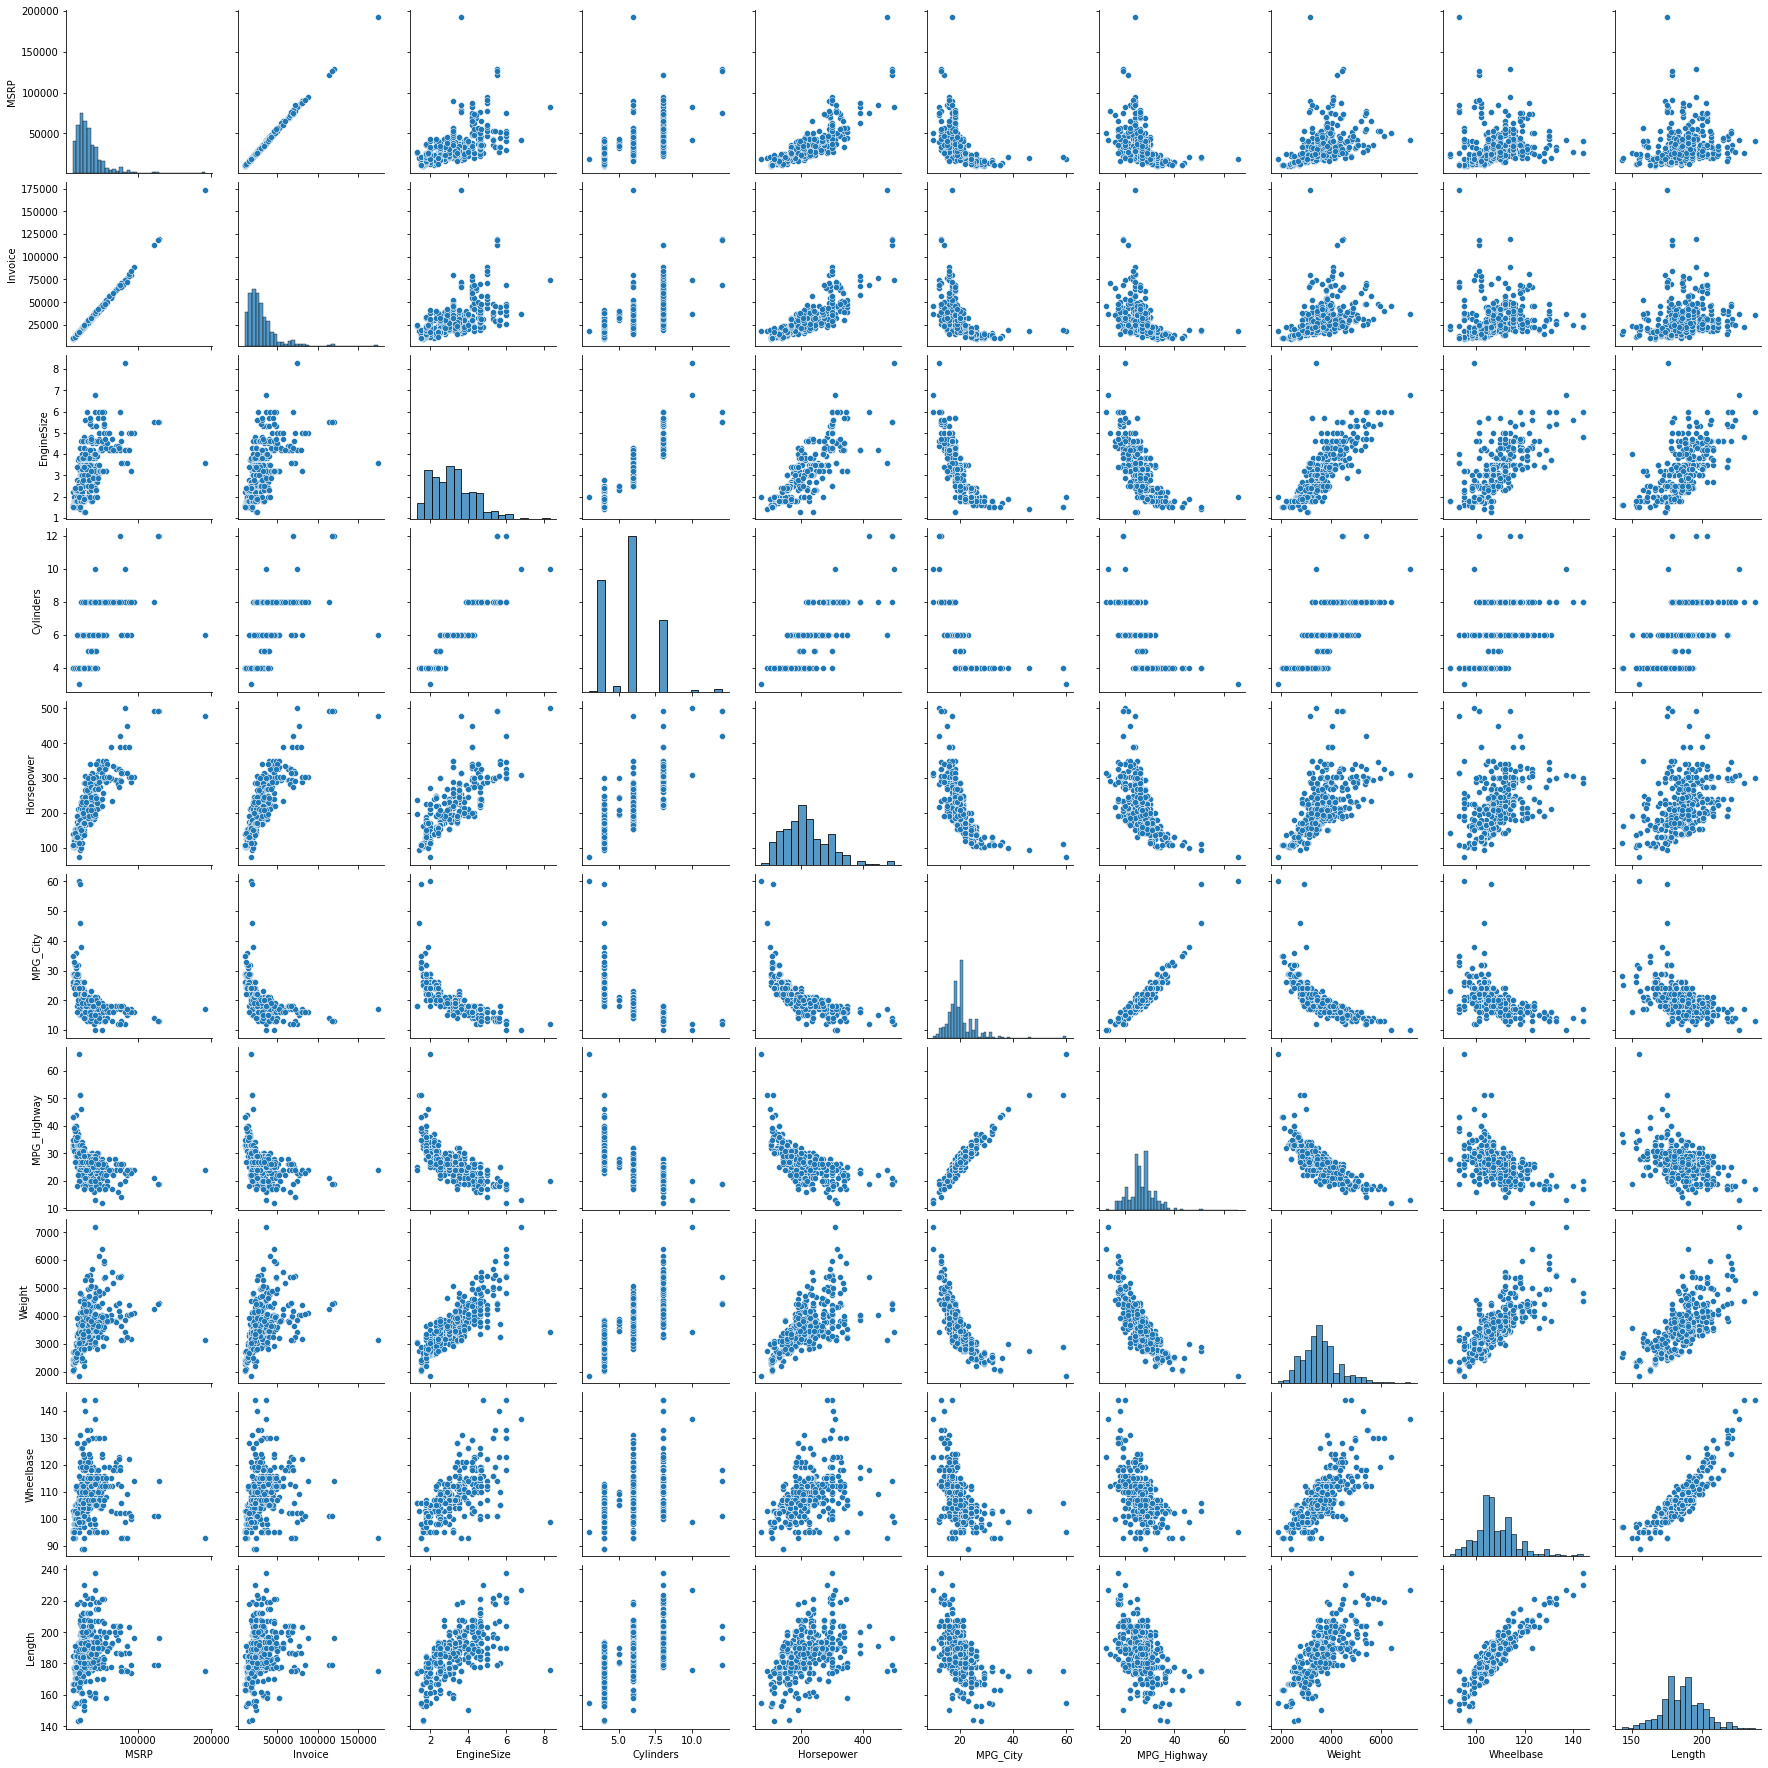

In [21]:
# scatterplots for joint relationships and histograms for univariate distributions

sns.pairplot(data=df)

In [22]:
# Let's view various makes of the cars
df["Make"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [23]:
fig = px.histogram(df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [24]:
# Let's view various types of the cars
df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [25]:
fig = px.histogram(df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [26]:
# Let's plot the location
df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [27]:
fig = px.histogram(df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [28]:
# Let's view the drivetrain of the cars
df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [29]:
fig = px.histogram(df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [30]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()


- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type 
- Find out which manufacturers has Hybrid

In [33]:
fig = px.histogram(df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

 PERFORMING DATA VISUALIZATION - PART #2

In [31]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [32]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [35]:
text = df.Model.values


In [36]:
stopwords = set(STOPWORDS)

In [37]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

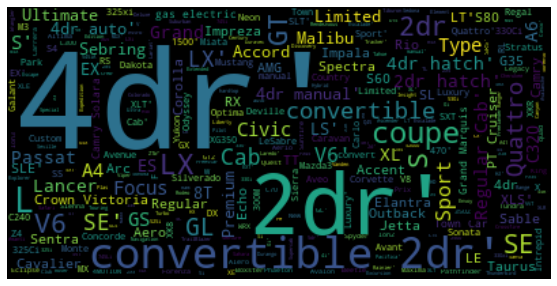

In [39]:
fig = plt.figure(figsize = (15, 5))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [40]:
# Obtain the correlation matrix
df.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649742,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.826945,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


In [41]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


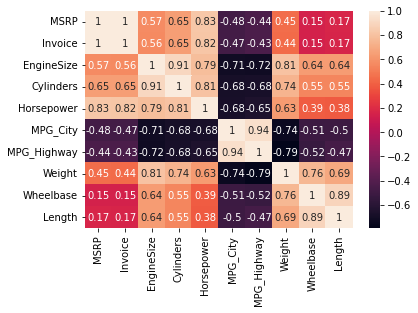

In [42]:
sns.heatmap(df.corr(),annot=True)

PREPARING THE DATA BEFORE MODEL TRAINING

In [43]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [44]:
df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [45]:
df=df.dropna()

In [46]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum=pd.get_dummies(df,columns=["Make", "Model", "Type", "Origin","DriveTrain"])

In [47]:
df_dum.head()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0


In [50]:
df_dum.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 483 columns):
 #    Column                                         Dtype  
---   ------                                         -----  
 0    MSRP                                           int64  
 1    Invoice                                        int64  
 2    EngineSize                                     float64
 3    Cylinders                                      float64
 4    Horsepower                                     int64  
 5    MPG_City                                       int64  
 6    MPG_Highway                                    int64  
 7    Weight                                         int64  
 8    Wheelbase                                      int64  
 9    Length                                         int64  
 10   Make_Acura                                     uint8  
 11   Make_Audi                                      uint8  
 12   Make_BMW                          

In [ ]:
# Invoice feature does not contribute to car price prediction 

In [51]:
df_data=df_dum.drop("Invoice",axis=1)
df_data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [52]:
df_data.shape

(426, 482)

In [53]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop(["MSRP"], axis = 1)
y = df_data["MSRP"]

In [54]:
X

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,Make_Audi,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,3.5,6.0,265,17,23,4451,106,189,1,0,...,0,0,0,0,1,0,0,1,0,0
1,2.0,4.0,200,24,31,2778,101,172,1,0,...,1,0,0,0,1,0,0,0,1,0
2,2.4,4.0,200,22,29,3230,105,183,1,0,...,1,0,0,0,1,0,0,0,1,0
3,3.2,6.0,270,20,28,3575,108,186,1,0,...,1,0,0,0,1,0,0,0,1,0
4,3.5,6.0,225,18,24,3880,115,197,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186,0,0,...,1,0,0,0,0,1,0,0,1,0
424,2.3,5.0,242,20,26,3450,105,186,0,0,...,1,0,0,0,0,1,0,0,1,0
425,2.9,6.0,268,19,26,3653,110,190,0,0,...,1,0,0,0,0,1,0,0,1,0
426,1.9,4.0,170,22,29,2822,101,180,0,0,...,0,0,0,1,0,1,0,0,1,0


In [57]:
y

array([ 36945,  23820,  26990,  33195,  43755,  46100,  89765,  25940,
        35940,  31840,  33430,  34480,  36640,  39640,  42490,  44240,
        42840,  49690,  69190,  48040,  84600,  35940,  37390,  40590,
        40840,  49090,  37000,  52195,  28495,  30795,  37995,  30245,
        35495,  36995,  37245,  39995,  44295,  44995,  54995,  69195,
        73195,  48195,  56595,  33895,  41045,  32845,  37895,  26545,
        22180,  26470,  24895,  28345,  32245,  35545,  40720,  52795,
        46995,  30835,  45445,  50595,  47955,  76200,  52975,  42735,
        41465,  30295,  20255,  11690,  12585,  14610,  14810,  16385,
        21900,  18995,  20370,  21825,  25000,  27995,  23495,  24225,
        26395,  27020,  44535,  51535,  36100,  18760,  20310,  40340,
        41995,  22225,  17985,  22000,  19090,  21840,  29865,  24130,
        26860,  25955,  25215,  33295,  30950,  27490,  38380,  34495,
        31230,  32235,  13670,  15040,  22035,  18820,  20220,  24885,
      

In [55]:
X = np.array(X)

In [56]:
y = np.array(y)

In [58]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)



- Verify that the split was successful 

In [167]:
X_train.shape,X_test.shape

((340, 481), (86, 481))

 TRAINING AND EVALUATING A MULTIPLE LINEAR REGRESSION

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [109]:
linear_regmodel=LinearRegression()
linear_regmodel.fit(X_train,y_train)

LinearRegression()

In [110]:
accuracy_LinearRegression = linear_regmodel.score(X_test, y_test)
accuracy_LinearRegression

0.8954755374293459

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Linear Regression Model')]

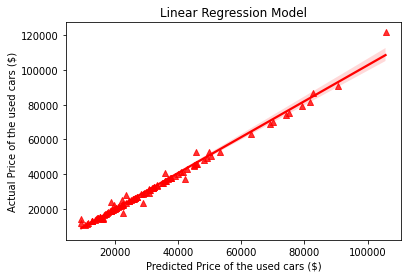

In [204]:
y_predict_linear = linear_regmodel.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [220]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 2233.33 
MSE = 4987762.633040095 
MAE = 750.1919040824461 
R2 = 0.986850820607038
